In [14]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from math import sqrt
from physics716_stat_tools import pdf_random_generator,plot_binned_data_with_errorbar
from scipy.stats import kstest # Kolmogorov-Smirnov test

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
chi2,chi2prob 14.804357673274968 0.5390116943531554
parameter_0= 159.14058023771767 +- 12.018721193258898
parameter_1= 3.4954092092271014 +- 0.03024255052439771
parameter_2= 0.430748609358882 +- 0.02720893214028731
parameter_3= 32.07696456116343 +- 1.3973686420840319


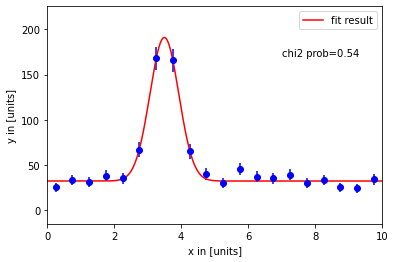

In [15]:
def func(x, a, b, c, d): # gauss + constant
    return a * np.exp(-(x-b)**2/(2.*c**2)) + d
true_mass=3.5
def my_pdf(x):
    return func(x,1.,true_mass,0.4,0.2)
generator = pdf_random_generator(my_pdf,0.,10.)
fig, ax = plt.subplots()
plt.margins(y=0.2)
plt.margins(x=0) #disable plotting margins
# create data
ndata=1000
xdata = generator.get_random(ndata)
# define the binning
nbins,xmin,xmax = 20,0.,10.
# prepare marker plot
xi,yi = plot_binned_data_with_errorbar(xdata,range=(xmin,xmax),nbins=nbins,color='blue')
si = np.sqrt(yi)
p_initial = (100,3.5,0.15,20)
# plot initial function 
# pyplot.plot(x, func(x, *p_initial), 'r-')

#
# curve fit
popt, pcov = curve_fit(func, xi, yi,p0=p_initial, sigma=si,absolute_sigma=False)
fitted_i = func(xi, *popt)
minimal_chi2 = np.sum((yi-fitted_i)**2/si**2) #
n_dof = len(xi) - len(popt)
chi2prob = chi2.sf(minimal_chi2,n_dof)
print("chi2,chi2prob",minimal_chi2,chi2prob)
for i in range(len(popt)): print("parameter_"+str(i)+"=",popt[i],"+-",sqrt(pcov[i][i]))
# plot fitted function
xplot = np.linspace(xmin,xmax,1000)
plt.plot(xplot, func(xplot, *popt), 'r-', label='fit result')
#
plt.xlabel('x in [units]')
plt.ylabel('y in [units]')
plt.legend(loc='upper right')

ax.text(7.,170,'chi2 prob='+str(np.round(chi2prob,decimals=2))) # %4.2, %4.2' % tuple(chi2,chi2prob))
plt.show()
fig.savefig("gaussfit.pdf")

[0.6092054696084184, 0.14885600752001088, 0.6550149380280368, 0.3422377534928544, 0.11890687022891204, 0.5677882220579501, 0.03433173677122701, 0.26947938184930686, 0.8146755470617323, 0.7024431324456257]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
std-dev and mean of pull distribution 1.0728573012255054 -0.018519936720340486 prob for mass pull being normal 0.16441313052195014


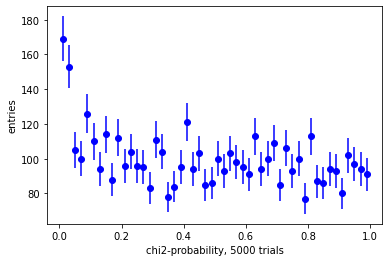

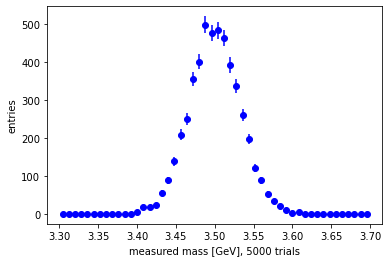

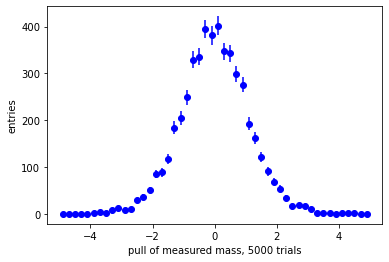

In [23]:
chi2probs,masses,masses_pull = [],[],[]
for itry in range(5000):
    xdata = generator.get_random(ndata)
    yi, bin_edges = np.histogram(xdata, bins=nbins, range=(xmin,xmax))
    xi = 0.5*(bin_edges[1:] + bin_edges[:-1]) # bin centers
    si = np.sqrt(yi)
    popt, pcov = curve_fit(func, xi, yi,p0=p_initial, sigma=si,absolute_sigma=False)
    fitted_i = func(xi, *popt)
    minimal_chi2 = np.sum((yi-fitted_i)**2/si**2) #
    n_dof = len(xi) - len(popt)
    chi2probs.append(chi2.sf(minimal_chi2,n_dof))
    masses.append(popt[1])
    masses_pull.append((popt[1]-true_mass)/sqrt(pcov[1,1]))
print(chi2probs[:10])
fig = plt.figure()
fig.add_subplot(1,1,1)
_ = plot_binned_data_with_errorbar(chi2probs,range=(0,1),nbins=50,color='black')
plt.xlabel('chi2-probability, 5000 trials')
plt.ylabel('entries')
fig2 = plt.figure()
fig2.add_subplot(1,1,1)
_ = plot_binned_data_with_errorbar(masses,range=(3.3,3.7),nbins=50,color='black')
plt.xlabel('measured mass [GeV], 5000 trials')
plt.ylabel('entries')
fig3 = plt.figure()
fig3.add_subplot(1,1,1)
_ = plot_binned_data_with_errorbar(masses_pull,range=(-5,5),nbins=50,color='black')
stats,pvalue = kstest(masses_pull,'norm')
plt.xlabel('pull of measured mass, 5000 trials')
plt.ylabel('entries')
print("std-dev and mean of pull distribution", np.std(masses_pull),np.mean(masses_pull),"prob for mass pull being normal",pvalue)